<h2 style="color:steelblue; text-align:center;">TELECOM CUSTOMER CHURN ANALYSIS</h2>

<h2 style = "color:skyblue">1.Introduction</h2>



What is Customer Churn?

Customer churn means when a customer stop using a company's services or leave the company.

Example: if 200 people were using a mobile service last months and 13 of them cancelled this month, then churn is 6.5%.

**👉<span style = 'color:teal'> Objective – Telecom Customer Churn Analysis**

 1. Find out who might stop using the service

 2. Understand why customers leave

 3. Help the company keep more customers

 4. Improve business decisions

 5. Save time and money

---------------------------------------------------------------------------

<h3 style = "color:steelblue">2. Loading libraries and data</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [70]:
#load the Data
df = pd.read_csv('Telco-Customer-Churn.csv')

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

---------------------------------------------------------------------------

<h3 style = "color:steelblue">3. Understanding the data</h3>

The column metadata show details of the each row in the data represents one customer, and each column shows different details about that customer

Metadata means "data about data." It provides additional information or context about the main data


<h2>About this file:</h2>

Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h1><span style = "color:blue">The data set includes information about columns:</h3>

- Customer Id       - 7043 unique values.

- Gender            - Whether the customer is a male or a female.

- SeniorCitizen     - Whether the customer is a senior citizen or not (1, 0).

- Partner           - Whether the customer has a partner or not (Yes, No).

- Dependents        - Whether the customer has dependents or not (Yes, No).

- tenure	        - Number of months the customer has stayed with the company.

- PhoneService	    - Whether the customer has a phone service or not (Yes, No).

- MultipleLines	    - Whether the customer has multiple lines or not (Yes, No, No phone service).

- InternetService   - Customer’s internet service provider (DSL, Fiber optic, No).

- OnlineSecurity	- Whether the customer has online security or not (Yes, No, No internet service).

- OnlineBackup      - Whether the customer has online backup or not (Yes, No, No internet service).

- DeviceProtection	- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport	    - Whether the customer has tech support or not (Yes, No, No internet service).

- StreamingTV       - Whether the customer has streaming TV or not (Yes, No, No internet service).

- StreamingMovies	- Whether the customer has streaming movies or not (Yes, No, No internet service).

- Contract	        - The contract term of the customer (Month-to-month, One year, Two year).

- PaperlessBilling	- Whether the customer has paperless billing or not (Yes, No).

- PaymentMethod	    - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card).

- MonthlyCharges	- The amount charged to the customer monthly.

- TotalCharges	    - The total amount charged to the customer.

- Churn             - Whether the customer churned or not (Yes or No).


In [4]:
# check how many rows and columns in data
df.shape

(7043, 21)

In [5]:
# Check quick summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There are 7043 (0-7042)rows and 21 columns.

- There is 1-float64, 2-int64 and 18-object kind of data.

- 1.1+ MB memory Usage.

In [6]:
# check column name: when you want to treat column name as special index
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# check column name with values: when you just want a plain list/array of column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#  data type of each column in your DataFrame.
# it return series where index = columns name and values = data types of columns(like int64, float64, obj, float, bool)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

-----------------------------------------------------------------------------------------

<h3 style = "color:steelblue">4. Check/visualize missing Values</h3>

In [9]:
# Check null value per columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-   Check as per columns there is no null values in this dataset.

**Visualize Missing Data with Seaborn Heatmap**

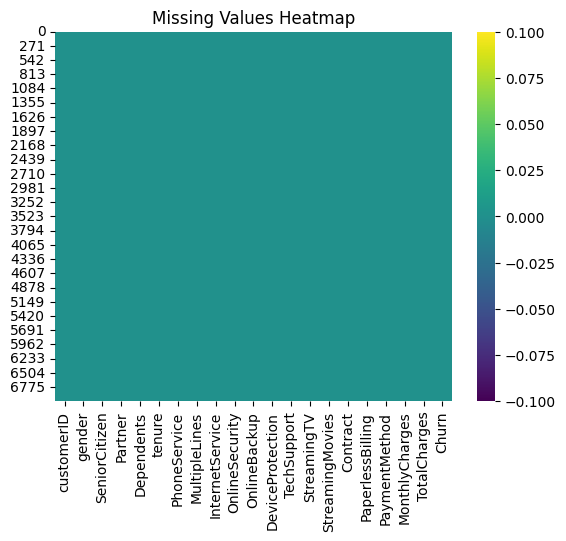

In [10]:
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Light color: missig value
# Dark color: non missing value

using this sns plpot we can quick find the missing value in dataset.

- From above plot we can observe that it has no any light color. so, there is no missing data

-----------------------------------------------------------------------------------------

<h3 style = "color:steelblue">5. Data Manipulation</h3>

In [72]:
# Remove CustomerID because It is not useful
df.drop('customerID', axis=1, inplace=True)

In [73]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- I drop customerID because it is unique identifier or doesn't carry any meaningful related to customer's churn(It has no connection to whether a customer will churn or not.).

In [13]:
# convert totalcharges to numeric because some value may be blank because dtype in object but value in number/float.as_integer_ratio
df['TotalCharges'].dtypes

dtype('O')

In [14]:
# on analsis the data we find some misigness in our data (some may be blankspaces).

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors= 'coerce')

In [15]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- We see that there is 11 missing values in 'TotalCharges' so we check this data.

In [16]:
# is used to filter and display all rows where the 'TotalCharges' column has NaN (missing) values.
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


   - Point to be noted that 'Tenure Column' is 0 for these entries but see monthly charge is not empty.

so we check any other 0 values in the 'Tenure column'

In [17]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There is no addditional missing values in 'Tenure Column'.

- lets delete the rows with missing values in Tenure columns since there are only 11 rows to delete them no affect the Data

In [18]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace= True)

In [19]:
# check one more time tenure columns the row is drop or not
df[df['tenure'] == 0].index

Index([], dtype='int64')

- Solve the problem of missing value in 'TotalCharges column', i decided to fill it with mean  of 'TotalCharges' values.

In [20]:
df.fillna(df['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
# Assuming your DataFrame is called df

# Loop through categorical columns and print unique values
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")
    print('_'*90)

gender: ['Female' 'Male']
__________________________________________________________________________________________
SeniorCitizen: ['No' 'Yes']
__________________________________________________________________________________________
Partner: ['Yes' 'No']
__________________________________________________________________________________________
Dependents: ['No' 'Yes']
__________________________________________________________________________________________
PhoneService: ['No' 'Yes']
__________________________________________________________________________________________
MultipleLines: ['No phone service' 'No' 'Yes']
__________________________________________________________________________________________
InternetService: ['DSL' 'Fiber optic' 'No']
__________________________________________________________________________________________
OnlineSecurity: ['No' 'Yes' 'No internet service']
__________________________________________________________________________________________
On

In [25]:
# Display unique value counts for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print('-'*100)



Column: gender
gender
Male      3549
Female    3483
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Column: SeniorCitizen
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Column: Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Column: Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Column: PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Column: MultipleLines
MultipleLines
No                  3385
Yes                 2967
N

In [26]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


-----------------------------------------------------------------------------------------

<h3 style = "color:steelblue">6. Data Visualization</h3>


In [27]:
cat_col = df.select_dtypes(include='object')

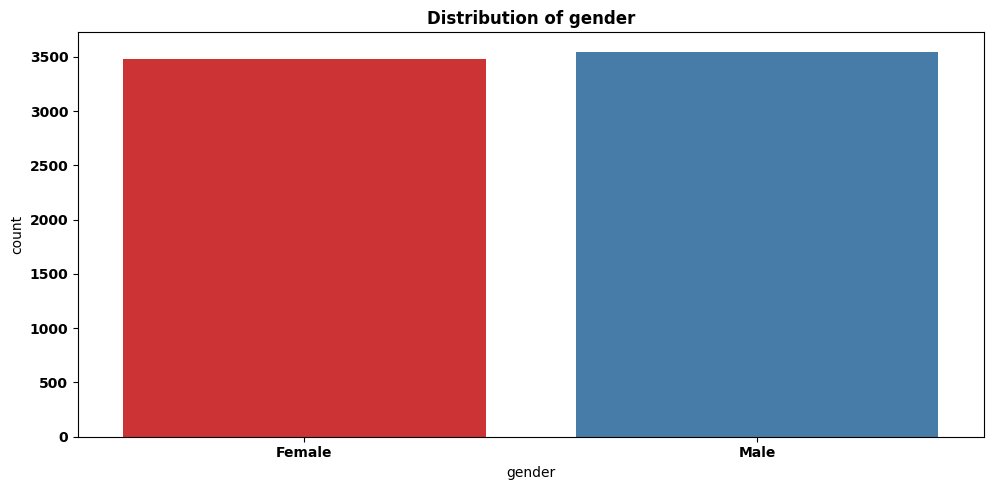

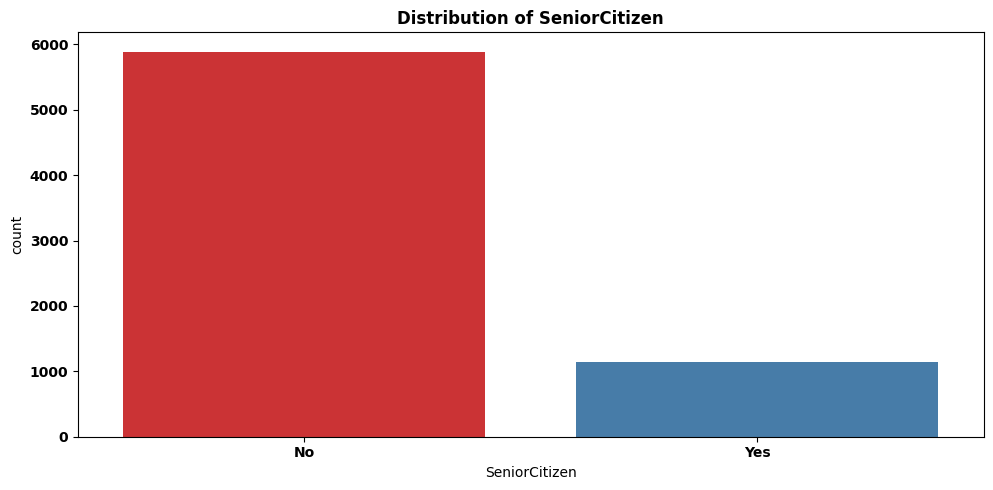

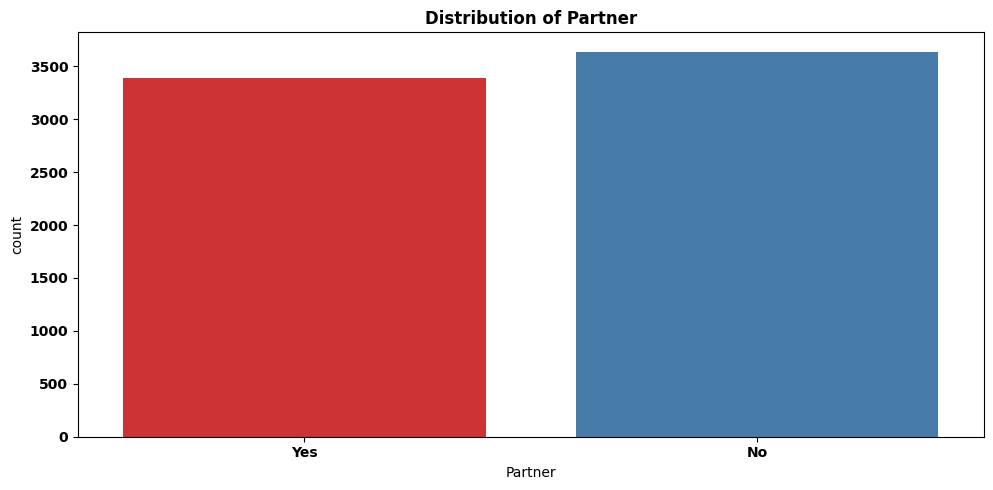

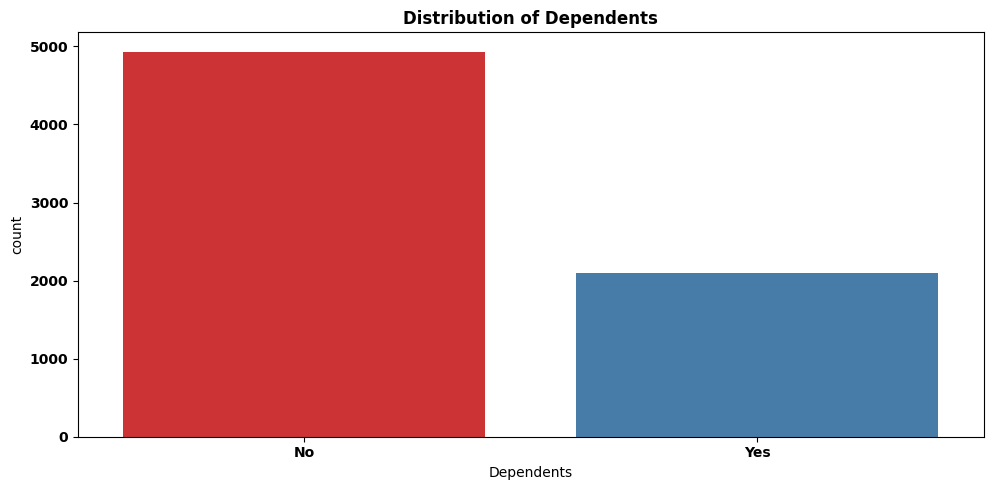

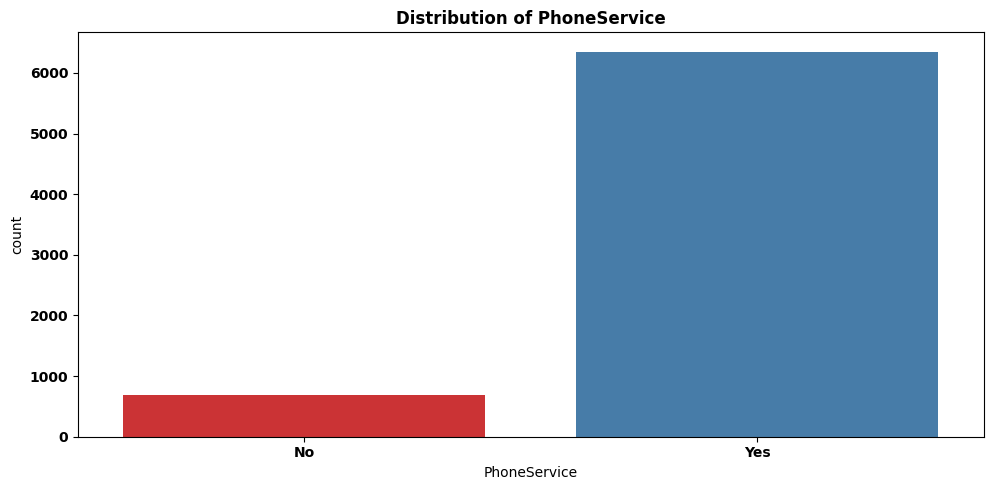

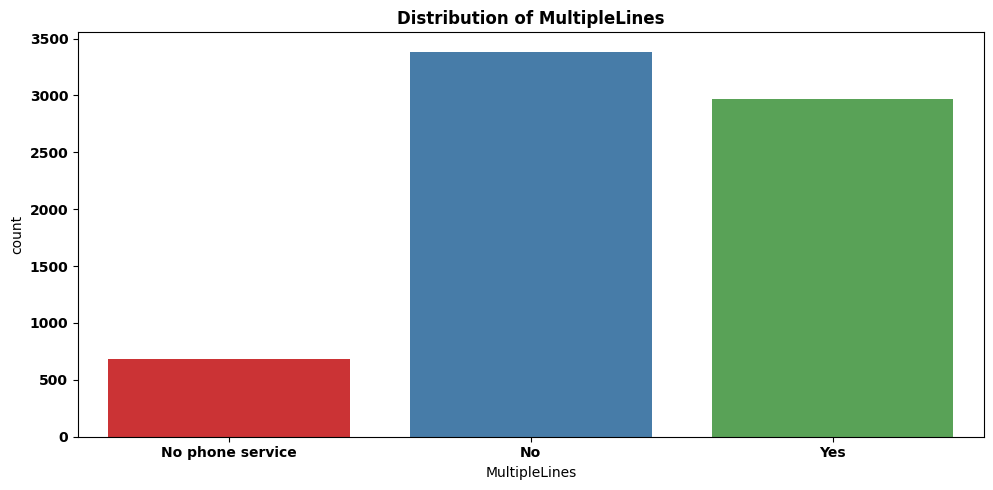

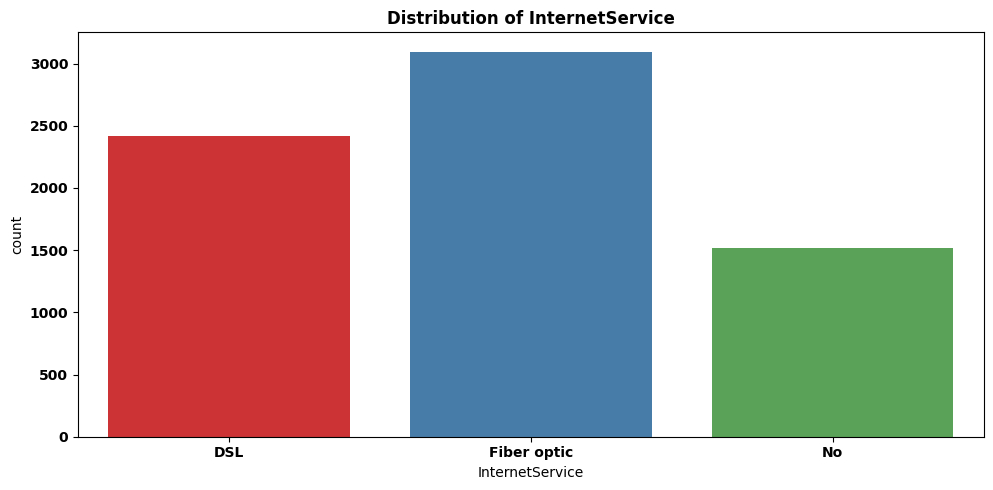

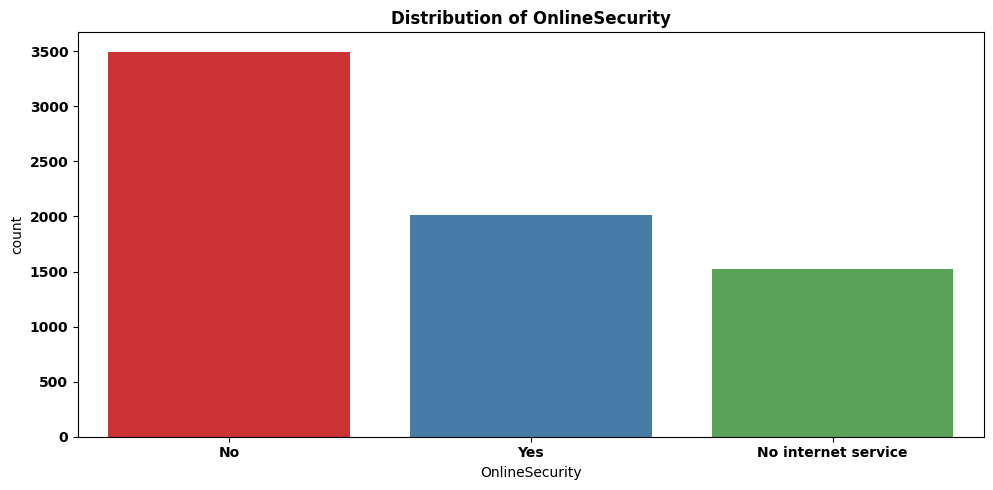

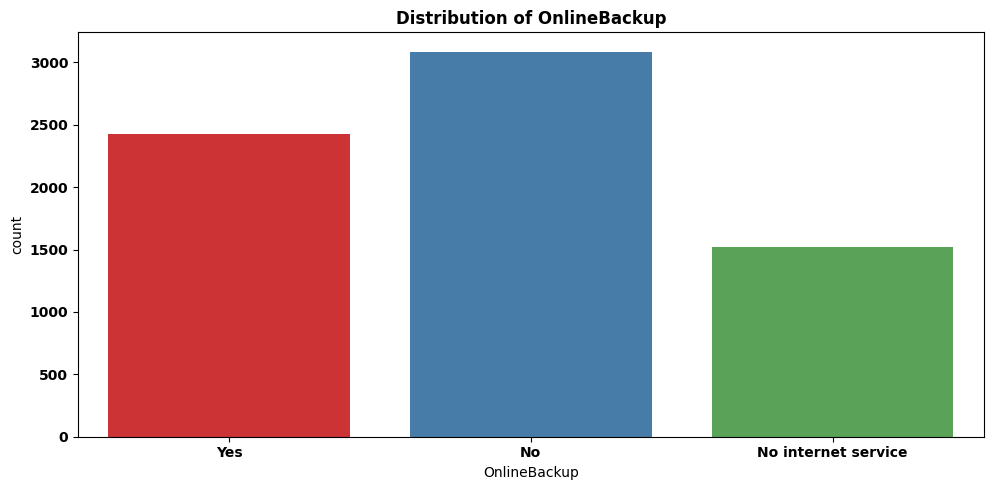

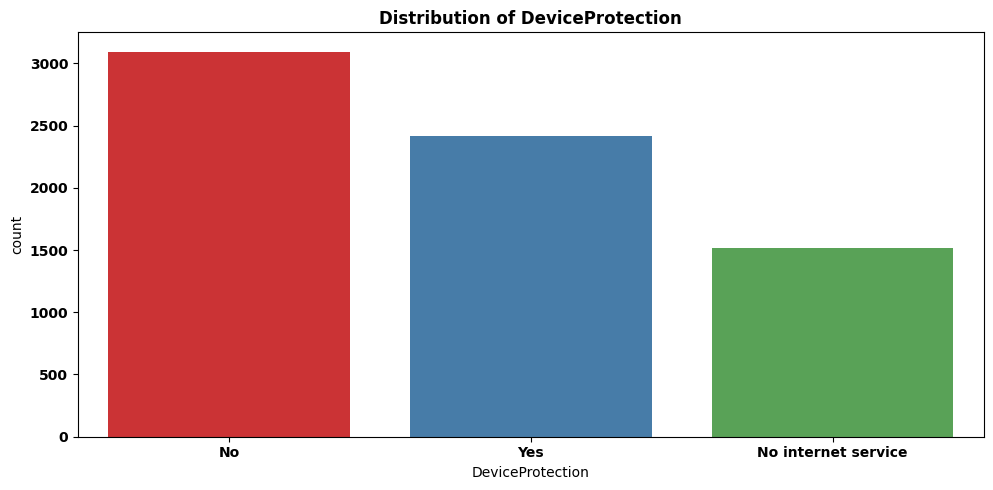

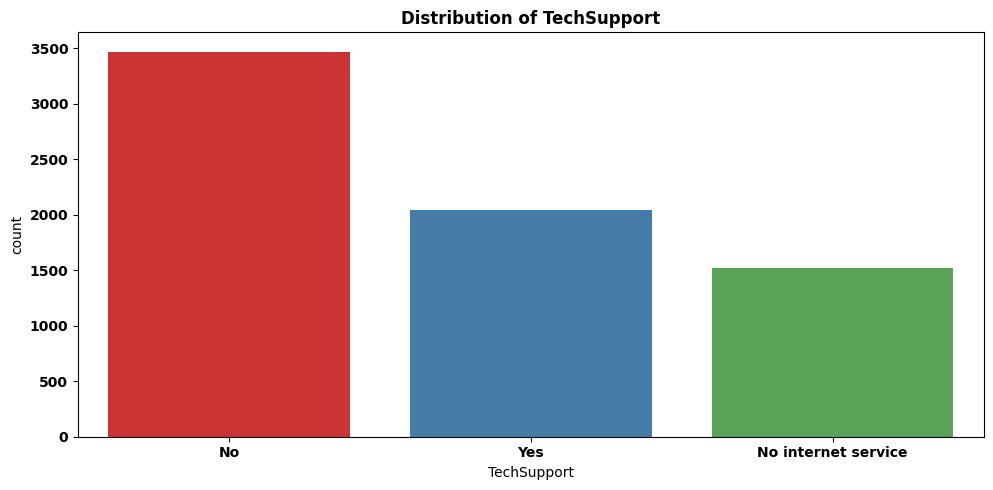

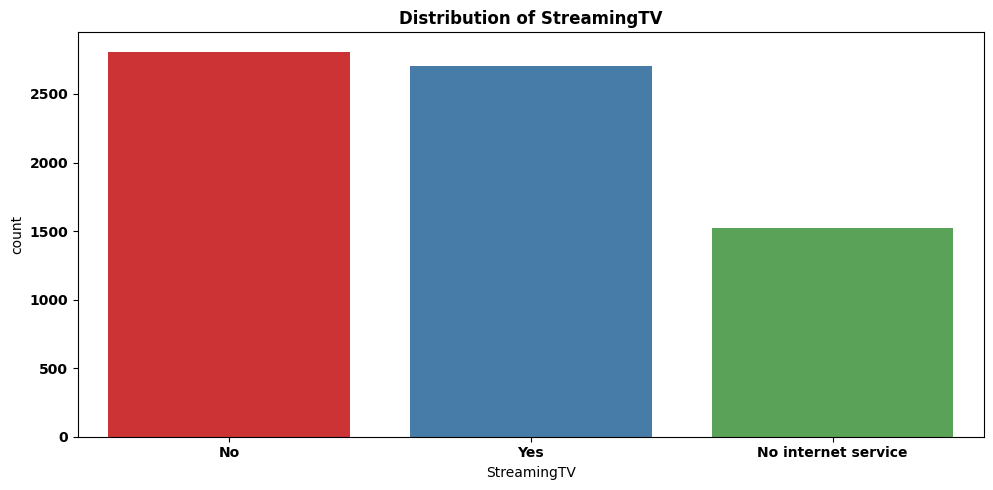

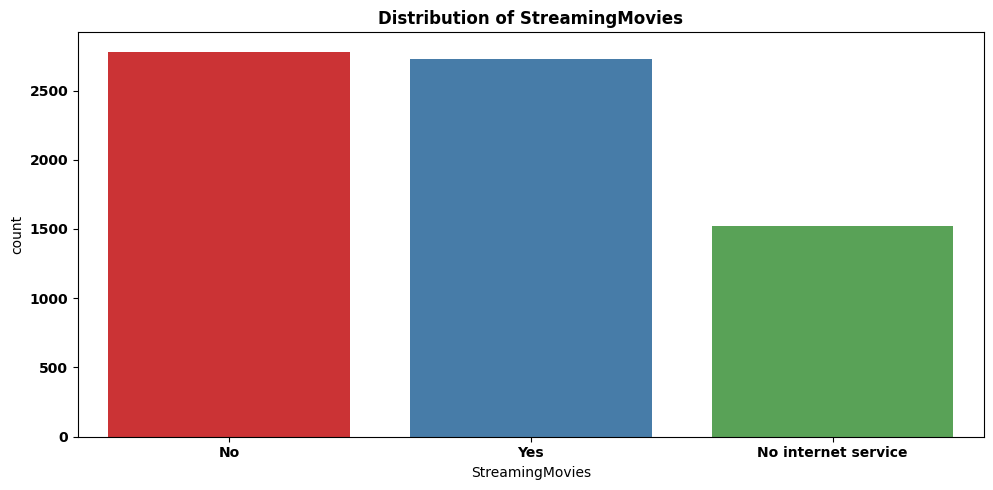

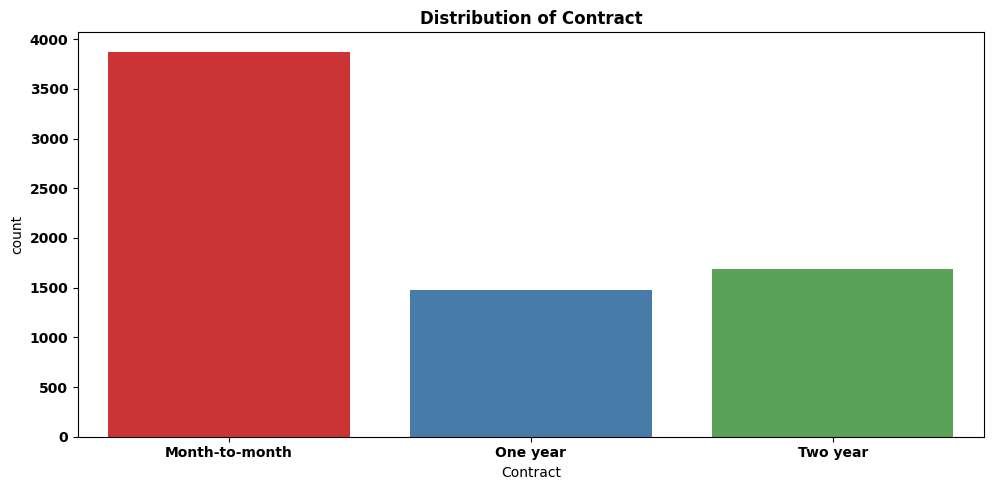

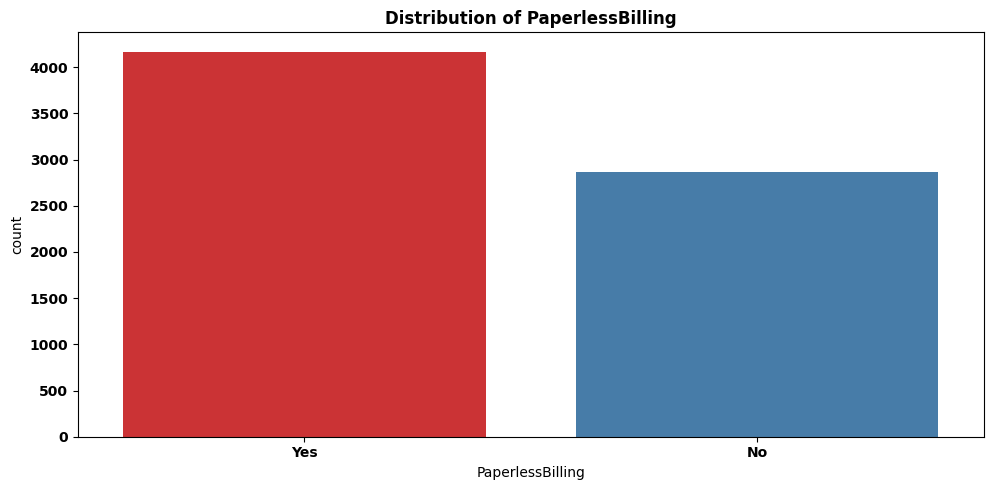

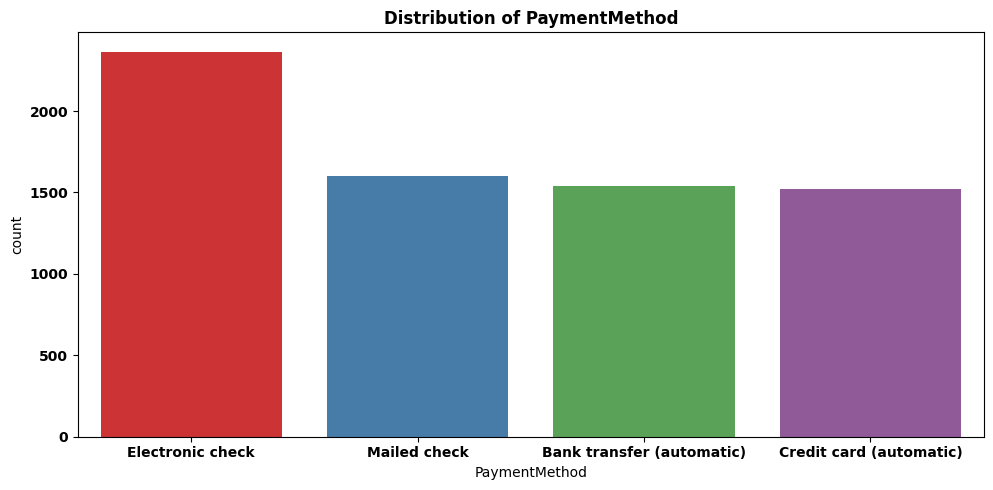

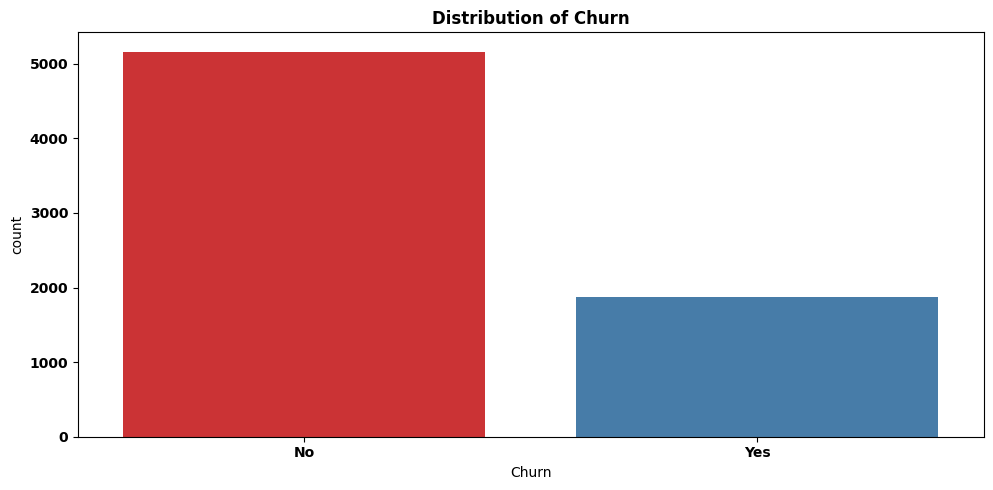

In [28]:
# List of categorical columns (you can adjust based on your dataset)
categorical_cols = cat_col
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, palette='Set1')
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.tight_layout()
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

In [29]:
num_col = df.select_dtypes(include='number')

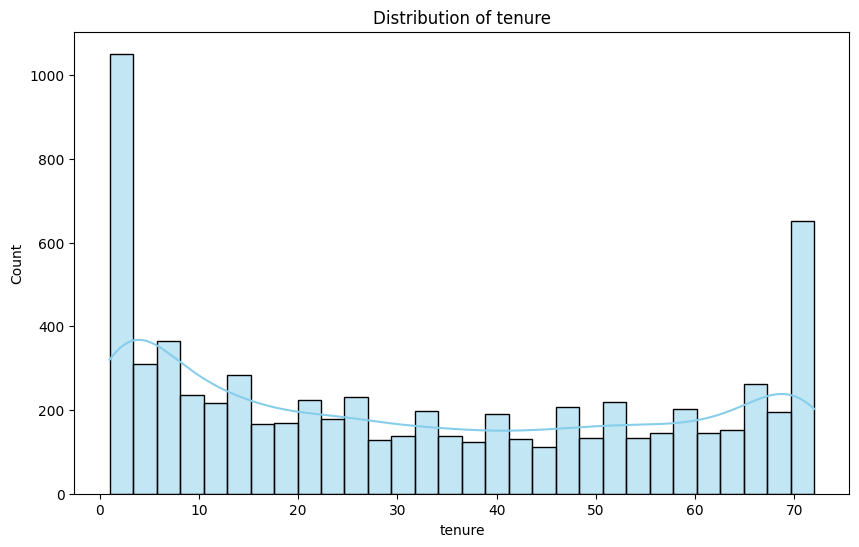

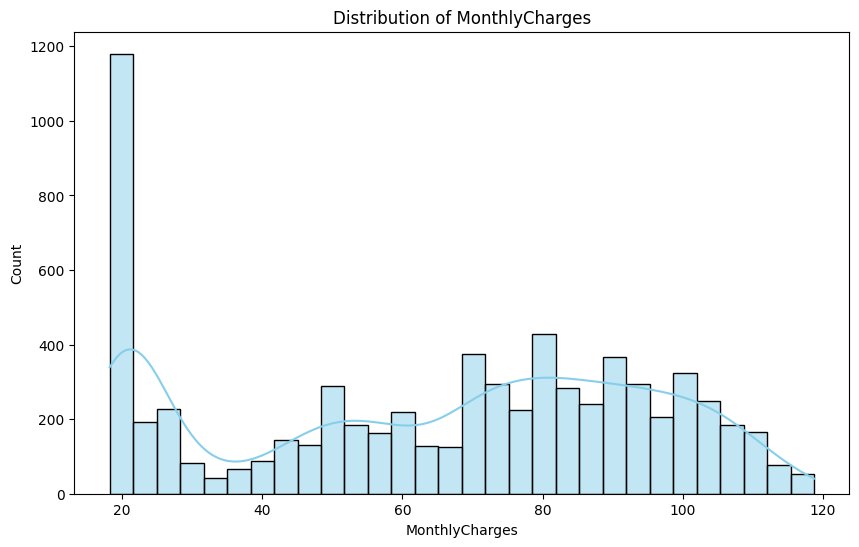

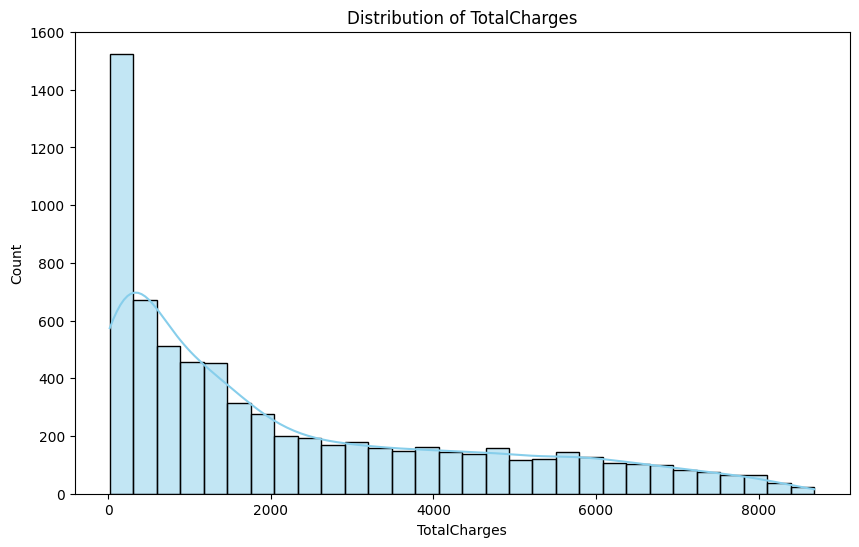

In [30]:
numerical_cols = num_col

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


Tenure:
- 7032 customer have tenure data
- On average, customers stay for about 32 months.
- Min  - The shortest stay is 1 month.
- Max  - The longest stay is 72 months (6 years).
- 25%	 - 25% of customers stayed 9 months or less.
- 50%  - 29	Half of the customers stayed 29 months or less.
- 75%	 - 75% of customers stayed 55 months or less.
--------------------------------------------------------
MonthlyCharge:

- mean - ₹64.80	On average, customers are charged ₹64.80 per month.
- std	- ₹30.09	This shows that monthly charges vary a lot between customers.
- min	- ₹18.25	The lowest monthly charge is ₹18.25.
- 25%	- ₹35.59	25% of customers are charged ₹35.59 or less.
- 50% - (median)	₹70.35	Half of the customers pay ₹70.35 or less.
- 75%	- ₹89.86	75% of customers pay ₹89.86 or less.
- max	- ₹118.75	The highest monthly charge is ₹118.75.
 ---------------------------------------
TotalCharges:

Many customers have low total charges — this might mean they are new or left early (churned).

High-paying customers (₹3000–₹8000) have been with the company for a long time and used many services.

There's a huge gap between short-term and long-term customers.

------------------------------

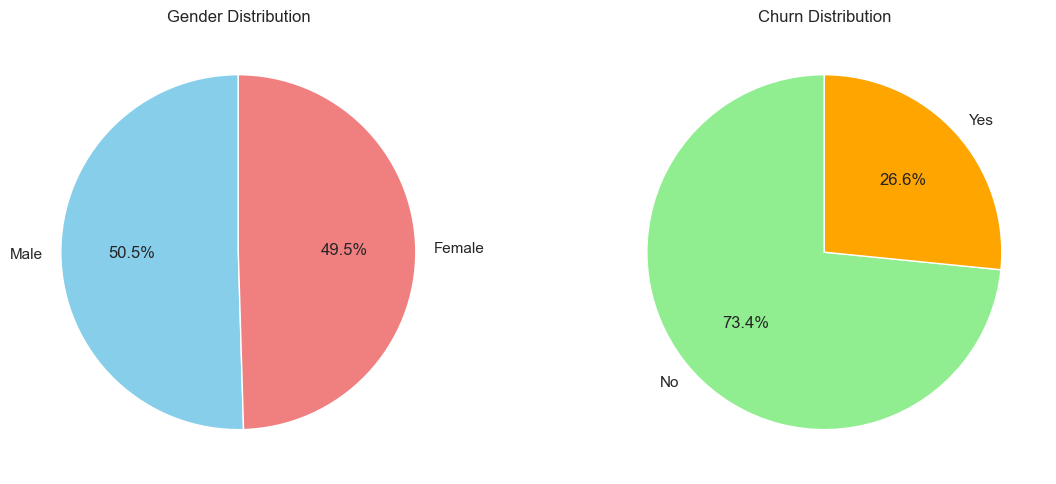

In [31]:
# Set a simple style
sns.set(style="whitegrid")

# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gender Distribution as pie chart
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], startangle=90, colors=['skyblue', 'lightcoral'])
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('')  # Hide y-label

# Churn Distribution as pie chart
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], startangle=90, colors=['lightgreen', 'orange'])
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()


- 26.6% of customers switched to other firm.
- Customers are 49.5% Female and 50.5% male.

In [32]:
df['Churn'][df['Churn'] == 'No'].groupby (by=df['gender']).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [33]:
df['Churn'][df['Churn'] == 'Yes'].groupby (by=df['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [34]:
df.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

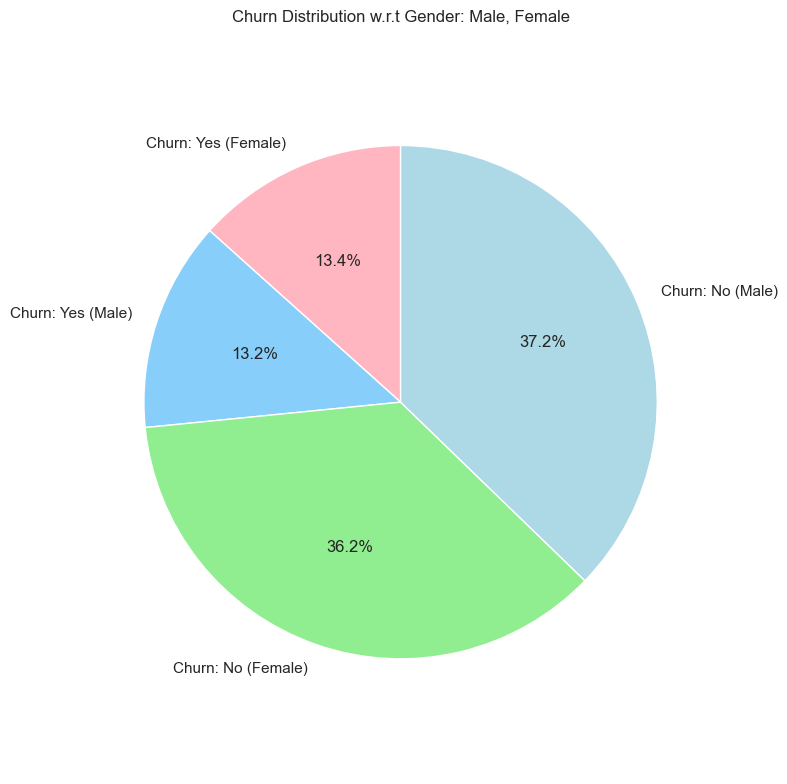

In [35]:
# Define labels and sizes
labels_gender = ["Churn: Yes (Female)", "Churn: Yes (Male)", "Churn: No (Female)", "Churn: No (Male)"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['lightpink', 'lightskyblue', 'lightgreen', 'lightblue']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes_gender, labels=labels_gender, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Churn Distribution w.r.t Gender: Male, Female")
plt.axis('equal')  # Ensures the pie is a circle

# Show plot
plt.tight_layout()
plt.show()

- Churn is fairly balanced between genders

    - total 1869 customers who left (Churn:yes) around 13.2% males and !3.4% Female

    - This shows that both genders are equally likely to churn.


What does this mean for business?

Marketing or retention strategies should not be based on gender alone.

### Contract Vs Churn

In [36]:
churn_contract = pd.crosstab(df['Contract'],df['Churn'], normalize='columns')*100
print(churn_contract)

Churn                  No        Yes
Contract                            
Month-to-month  42.998257  88.550027
One year        25.295371   8.881755
Two year        31.706372   2.568218


- **Months-to-months** contract show a very high churn rate : 88.5%
- **One-year** contract customers churn much less (8.88%), showing better retention.
- **Two-year** contracts have the lowest churn at just 2.57%.

In [37]:
churn_contract = churn_contract.reset_index()

<Figure size 1000x600 with 0 Axes>

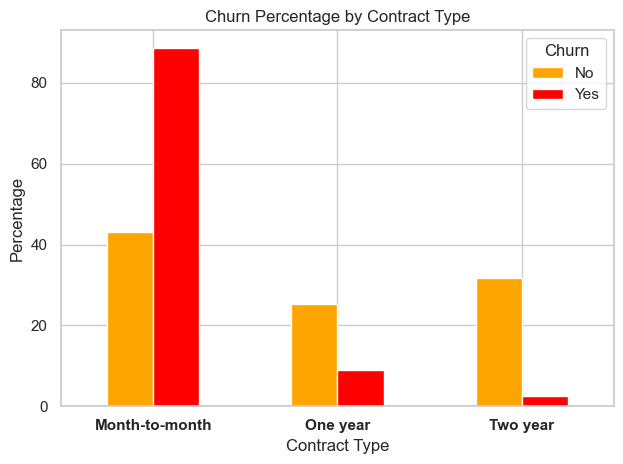

In [38]:
# Plot

plt.figure(figsize=(10,6))
churn_contract.plot(x='Contract', kind='bar', stacked=False, color=['Orange', 'Red'])
plt.title('Churn Percentage by Contract Type')
plt.ylabel('Percentage')
plt.xlabel('Contract Type')
plt.legend(title='Churn')
plt.xticks(fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

**<span style = color:red>Recommendation:**

Encourage month-to-month users to upgrade to longer contracts.

Offer incentives like discounts or bonus features for switching.

Focus retention efforts on the month-to-month group.

---------------------------------

In [39]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='columns') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),24.869262,13.804173
Credit card (automatic),24.966105,12.413055
Electronic check,25.062948,57.303371
Mailed check,25.101685,16.479401


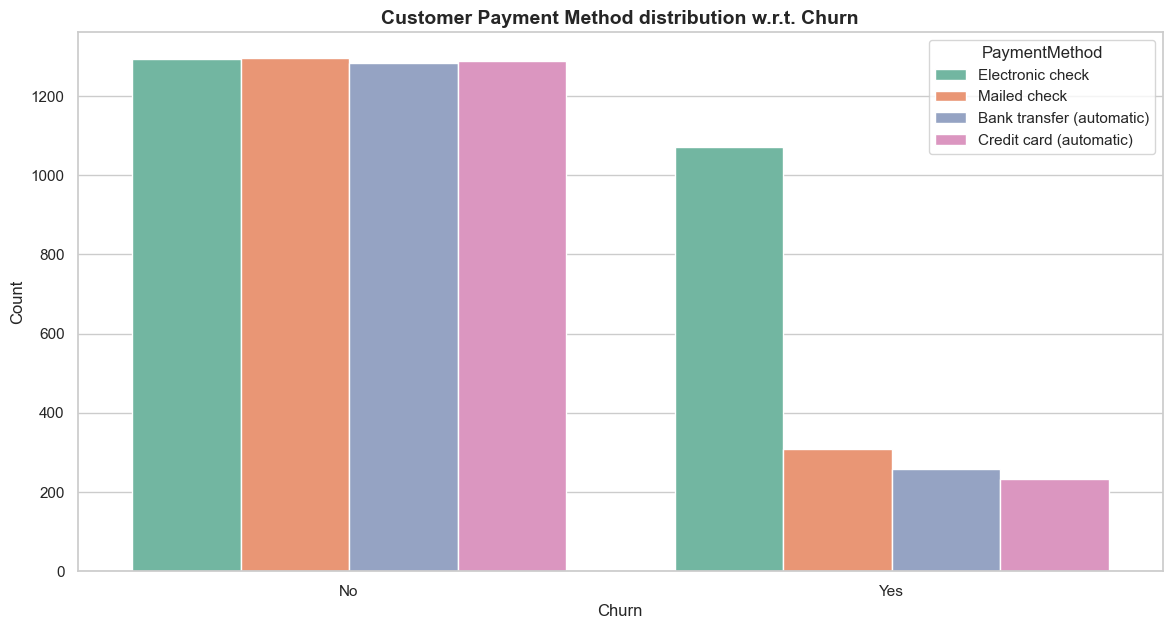

In [40]:
# Set figure size
plt.figure(figsize=(14, 7))

# Create the histogram
sns.countplot(x='Churn', hue='PaymentMethod', data=df, palette='Set2')

# Set title and labels
plt.title('Customer Payment Method distribution w.r.t. Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


<h3>1.Lowest churn is among:</h3>

 - Credit card (automatic): Only 12.41% churn.

 - Bank transfer (automatic): 13.80% churn.

- These automatic methods show strong customer retention.

**<h3> <span style = color:red>2. Highest churn is for:</h3>**

  - Electronic check: 57.30% churn.

  - Indicates a potential risk segment — maybe due to payment friction or customer type.

<h3>3. Mailed check</h3> users also churn more than automatic users (16.47%) but significantly less than electronic check users.

--------------------------------

"To reduce customer churn and keep customers for a longer time, the company should encourage more people to use automatic payment methods like credit cards or bank transfers. Also, the company should improve the experience for people who use electronic checks. Even small changes in how customers pay can help keep more of them from leaving."

-----------------------------------

Investigate why electronic check users have such a high churn rate — possible reasons could include payment failures, lack of digital comfort, or perceived complexity.


In [41]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [42]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [43]:
import pandas as pd

# Sample data based on your counts
data = {
    ('Male', 'DSL', 'No'): 992,
    ('Male', 'DSL', 'Yes'): 240,
    ('Male', 'Fiber optic', 'No'): 910,
    ('Male', 'Fiber optic', 'Yes'): 633,
    ('Male', 'No', 'No'): 717,
    ('Male', 'No', 'Yes'): 57,
    
    ('Female', 'DSL', 'No'): 965,
    ('Female', 'DSL', 'Yes'): 219,
    ('Female', 'Fiber optic', 'No'): 889,
    ('Female', 'Fiber optic', 'Yes'): 664,
    ('Female', 'No', 'No'): 690,
    ('Female', 'No', 'Yes'): 56,
}

# Convert to DataFrame
index = pd.MultiIndex.from_tuples(data.keys(), names=['Gender', 'InternetService', 'Churn'])
df = pd.DataFrame({'Count': data.values()}, index=index).reset_index()

# Calculate total users per Gender and InternetService
total_counts = df.groupby(['Gender', 'InternetService'])['Count'].sum().reset_index(name='Total')

# Merge total back into original DataFrame
df = df.merge(total_counts, on=['Gender', 'InternetService'])

# Calculate churn percentage
df['Churn_Rate (%)'] = round((df['Count'] / df['Total']) * 100, 2)

# Only show churned rows for churn rate analysis
churn_rate_df = df[df['Churn'] == 'Yes'][['Gender', 'InternetService', 'Churn_Rate (%)']]

# Display the result
print(churn_rate_df)


    Gender InternetService  Churn_Rate (%)
1     Male             DSL           19.48
3     Male     Fiber optic           41.02
5     Male              No            7.36
7   Female             DSL           18.50
9   Female     Fiber optic           42.76
11  Female              No            7.51


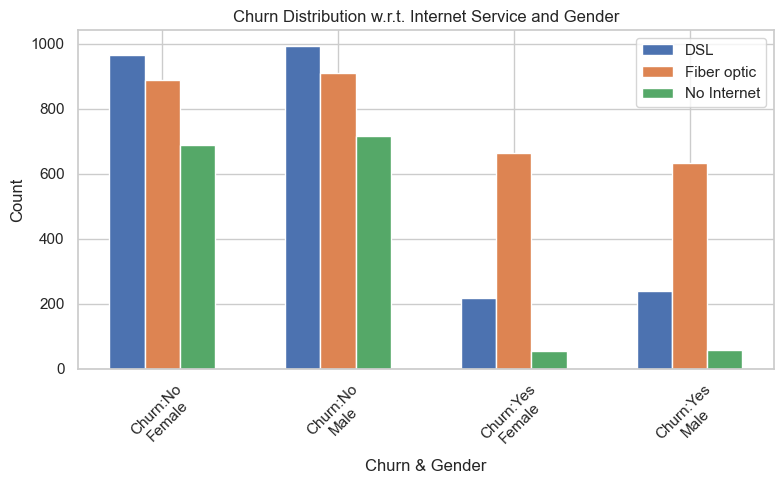

In [44]:
import matplotlib.pyplot as plt

# Data
categories = ['Churn:No', 'Churn:Yes']
genders = ['Female', 'Male']
internet_services = ['DSL', 'Fiber optic', 'No Internet']

# Values for each combination of churn, gender, and internet service
data = {
    'DSL': [965, 992, 219, 240],
    'Fiber optic': [889, 910, 664, 633],
    'No Internet': [690, 717, 56, 57]
}

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.2
index = [0, 1, 2, 3]  # Positions for bars

# Plot each internet service
for i, service in enumerate(internet_services):
    ax.bar([x + i * bar_width for x in index], data[service], bar_width, label=service)

# Label x-axis with Churn and Gender combinations
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels([f"{churn}\n{gender}" for churn in categories for gender in genders])

# Add title and labels
ax.set_title('Churn Distribution w.r.t. Internet Service and Gender')
ax.set_xlabel('Churn & Gender')
ax.set_ylabel('Count')

# Show the legend
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

**<span style = color:Red>1. Fiber Optic = High Churn:**

  - Over 41% of males and 43% of females using fiber optic internet have left.

  - This is the highest churn rate among all services for both genders.

2.DSL = Moderate Churn:

 - Around 19% of DSL users churned (both male and female).

 - Better retention than fiber optic, but not the best.

3.No Internet Service = Lowest Churn:

 - Only around 7% churn rate for those with no internet service.

4.Gender Comparison:

 - Churn rates are very similar for both men and women across all internet services.


 ------------------------------------

 Business Conclusion:

"Both male and female customers who use fiber optic internet are more likely to leave the company compared to DSL or no internet service. This suggests there might be problems with the fiber optic service --- such as price, reliability, or customer experience. The company should focus on improving the fiber optic service and maybe offer special deals or support to reduce churn. Gender does not have a big impact, so the same strategy can be used for both men and women."

### Dependent vs Churn

In [65]:
pd.crosstab(df['Dependents'], df['Churn'])

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


- Customers without dependents are twice as likely to churn compared to those with dependents.

- Dependents could indicate family stability or greater need for continued service, leading to higher loyalty.

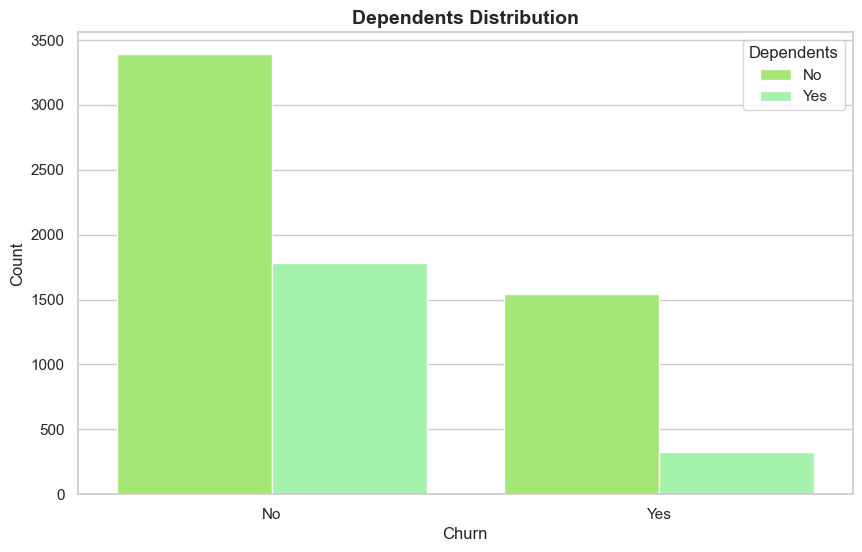

In [ ]:
# Create a custom color map
color_map = {"Yes": "#97FFA017", "No": "#A2FA6358"}

# Set the figure size
plt.figure(figsize=(10,6))

# Create the countplot with custom colors
sns.countplot(x='Churn', hue='Dependents', data=df, palette=color_map)

# Set the title and labels
plt.title('Dependents Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**<span style = color:red>Customers who don’t have dependents are more likely to leave. So, the company should give them special offers or plans to make them stay longer.**

-------------------------------------------------------

### SeniorCitizen Vs Churn

In [ ]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['SeniorCitizen'], df['Churn'])

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


**Non-Senior Citizens:**
  - (1393/5890)×100 = 23.65

**Senior Citizen:**
  - (476/1142)×100 = 41.68

- Senior Citizens are more likely to leave the service.

- 42 out of every 100 senior customers leave, compared to only 24 out of 100 non-senior customers.

In [ ]:
color_map = {1: '#00CC96', 0: '#B6E880'}  # 1 = Yes (Senior), 0 = No (Not Senior)

fig = px.histogram(
    df,
    x="Churn",
    color="SeniorCitizen",
    title="<b>Churn distribution w.r.t. Senior Citizen</b>",
    color_discrete_map=color_map
)

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


**<span style = color:red>Business Recommendation:
Customers who are senior citizens are more likely to churn. The company should take extra care of them by offering easy-to-understand plans, better customer support, or special discounts to keep them happy and reduce churn.**

---------------------------

### Online Security Vs Churn

In [ ]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['OnlineSecurity'],df['Churn'])

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


**No:**
  - (1461/3497)×100 = 41.77

**No internet service:**
   - (113/1520)×100≈7.43

**Yes:**
   - (295/2015)×100≈14.64


Customers without Online Security are more likely to leave. About 42 out of 100 of them churn, compared to only 15 out of 100 of those with Online Security.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**<span style = color:red>Business Advice:
Offer Online Security as a bundled or discounted feature to customers who don’t have it. This could help reduce churn and improve customer loyalty.**

--------------

In [ ]:
pd.crosstab(df['PaperlessBilling'], df['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


- Customers with Paperless Billing are twice as likely to leave compared to those without it.
- About 34 out of 100 customers with Paperless Billing churn, compared to only 16 out of 100 with paper bills.

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**<span style = color:red>Consider improving the experience of paperless billing—make it more transparent, user-friendly, or offer incentives to stay.**

--------------------------------------

### TechSupport Vs Churn

In [ ]:
df.TechSupport.value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['TechSupport'], df['Churn'])

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Customers without Tech Support are more likely to leave — around 42 out of 100 churned.
But those with Tech Support have a much lower churn rate — only 15 out of 100 left.

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**<span style = color:Red>Business Suggestion:
Encourage customers to subscribe to Tech Support by bundling it with plans or offering it at a discount. This could help in reducing churn.**

------------------------------------------------------

In [ ]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['DeviceProtection'], df['Churn'])

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


Customers without device protection are more likely to leave - 39 out of 100 churn.
Those with device protection churn less - only 23 out of 100.
Customers with no internet service churn the least.

In [ ]:
fig = px.histogram(df, x="Churn", color="DeviceProtection",barmode="group",  title="<b>Chrun distribution w.r.t. DeviceProtection</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<span style = color:red>**Business:
Promote device protection plans — maybe offer trials or bundles. It helps keep customers longer and reduces churn.**

--------------------------------------

In [ ]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [ ]:
pd.crosstab( df['Churn'], df['PhoneService'])

PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699


Total Customers:

- No PhoneService = 510 + 170 = 680
- Yes PhoneService = 4653 + 1699 = 6352

**Churn Rate**

- No Phoneservice Churn Rate = 170/680 = 25.0%
- Yes PhoneService Churn Rate 1699/6352 = 26.7%

**Insights**

- Customers without PhoneService, about 25% of them churn.
- Customers with PhoneService, about 26.7% of them churn.

In [ ]:
import plotly.express as px

# Correct color values (color names or hex codes)
color_map = {"Yes": 'blue', "No": 'orange'}  # Ensure these match actual values in 'PhoneService'

fig = px.histogram(
    df,
    x='Churn',
    color='PhoneService',
    title='<b>Churn distribution W.r.t PhoneService</b>',
    color_discrete_map=color_map
)

# Corrected: 'bargap' instead of 'bargrap'
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

**<Span style ='color:red'>This means having PhoneService or not does not have a big impact on churn — both groups have almost the same churn rate.**

In [ ]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

**Average Monthly Charges by Churn:**

- Customers who did not churn (No) have an average monthly charge of ₹61.31

- Customers who churned (Yes) have an average monthly charge of ₹74.44

**Insights**

- Customers who are leaving the service are paying higher monthly charges (₹74.44).
- Customers who are staying are paying lower charges (₹61.31).

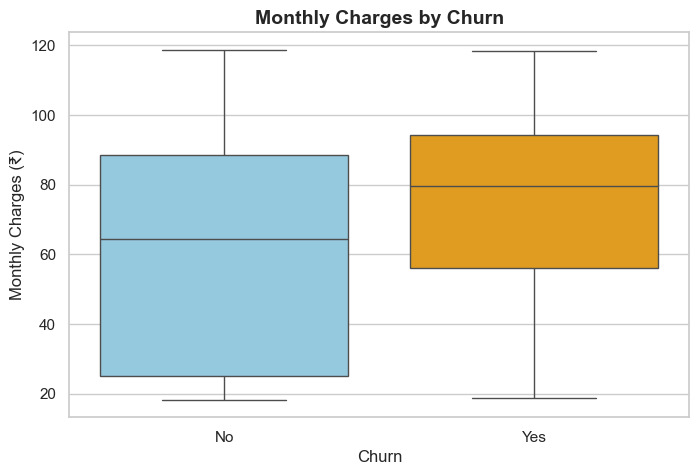

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the box plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette={'Yes': 'orange', 'No': 'skyblue'})

# Set plot title and labels
plt.title('Monthly Charges by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges (₹)', fontsize=12)

# Show plot
plt.show()


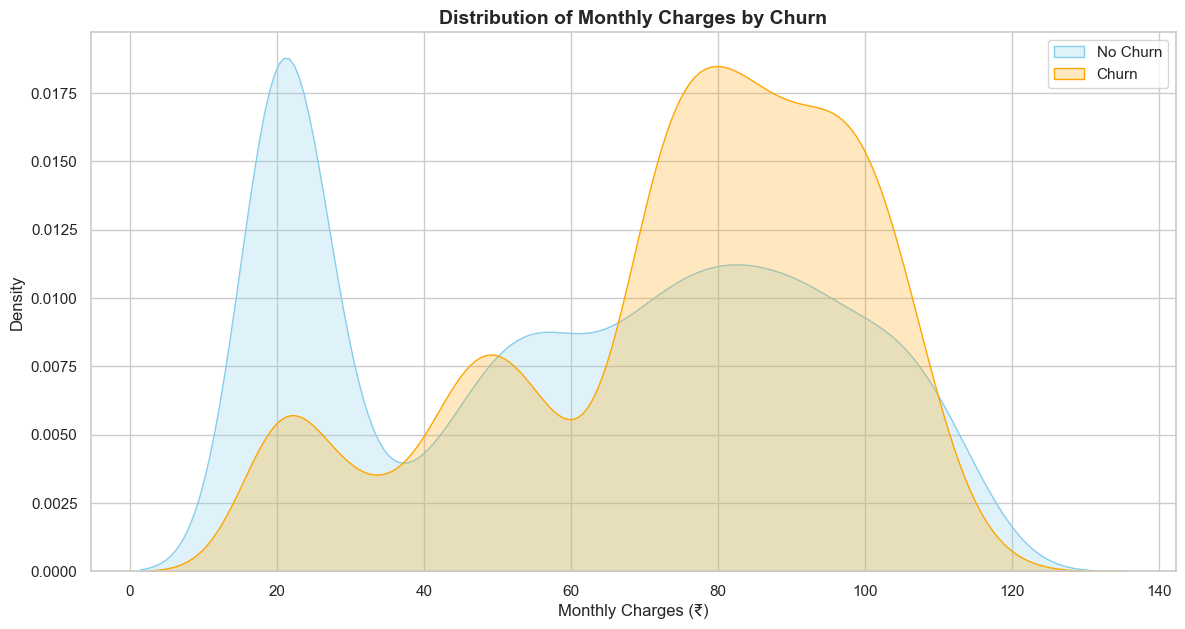

In [ ]:
plt.figure(figsize=(14, 7))

sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', label='No Churn', fill=True, color='skyblue')
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', label='Churn', fill=True, color='orange')

plt.title('Distribution of Monthly Charges by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges (₹)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

<span style = 'color:red'>**This means that high monthly charges could be one of the reasons for churn.
Customers may be leaving because they are unhappy with the high bills.**


In [ ]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64

- Customers who did NOT churn (No) paid an average total of rs 2555.34

- Customers who churned (Yes) paid an average total of rs 1531.79

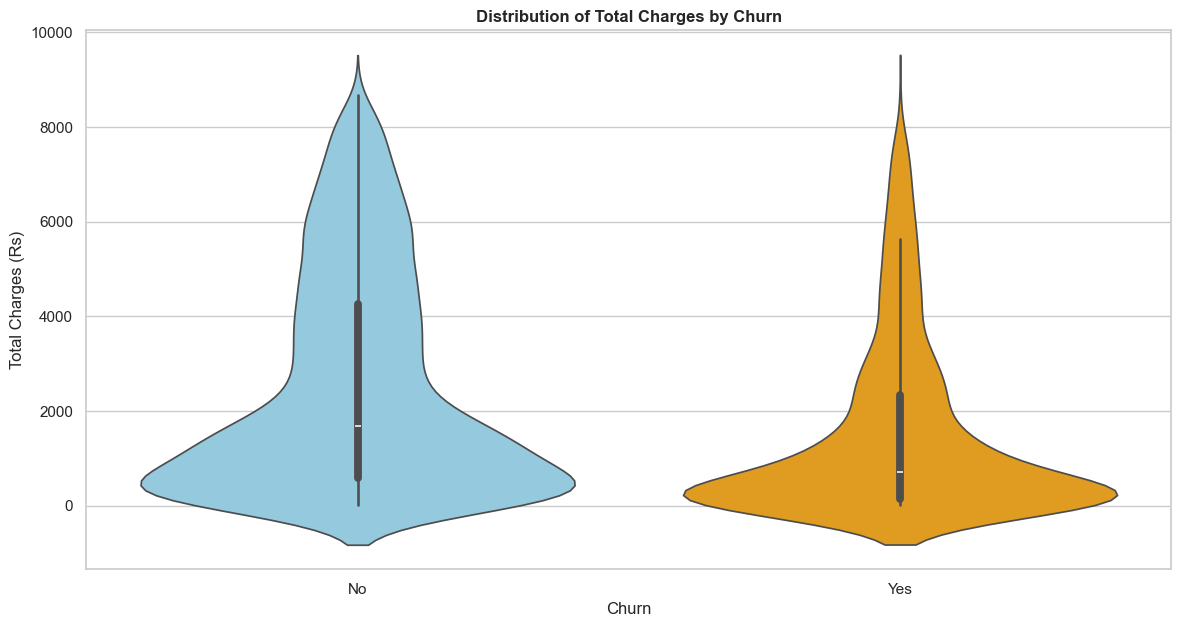

In [ ]:
plt.figure(figsize=(14,7))

sns.violinplot(x='Churn', y='TotalCharges', data=df, palette={'Yes': 'orange', 'No': 'skyblue'})

plt.title('Distribution of Total Charges by Churn', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Total Charges (Rs)')
plt.show()

**This plot will show:**

- The density distribution of TotalCharges for customers who churned and who did not.

- The median and interquartile range.

- Any outliers clearly as thin tails or dots.


Notes:

- **<span style = color:red>Outliers can tell interesting stories about customers who pay very high bills or have unusual behavior.**

- **<span style = color:red>“There are some customers with very high total charges, which might represent long-term or premium customers.”**



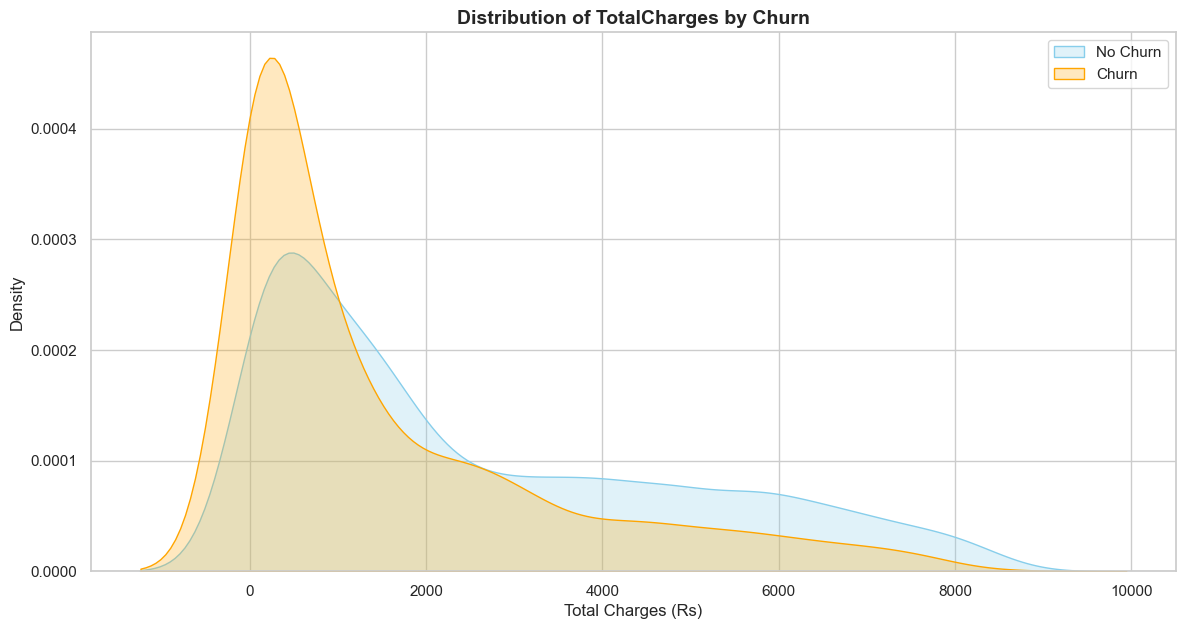

In [ ]:
plt.figure(figsize=(14, 7))

sns.kdeplot(data=df[df['Churn'] == 'No'], x='TotalCharges', label='No Churn', fill=True, color='skyblue')
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='TotalCharges', label='Churn', fill=True, color='orange')

plt.title('Distribution of TotalCharges by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges (Rs)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

**<span style = color:red>customers who stay longer give more total charges, while those who leave tend to have paid less overall (maybe because they left earlier).**

In [ ]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

- Customers who did not churn have stayed for an average of 38 months.
- Customers who churned only stayed for an average of 18 months.

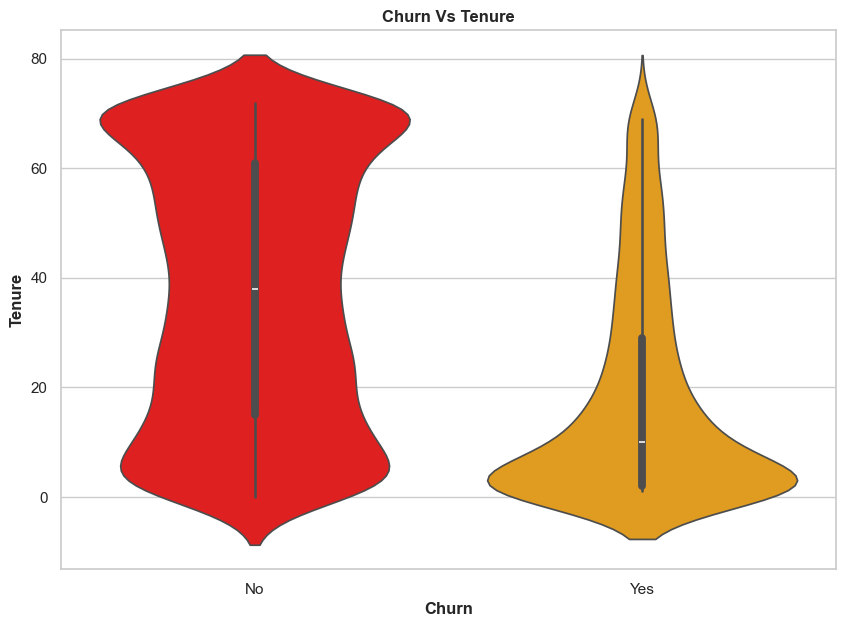

In [ ]:
plt.figure(figsize=(10,7))

sns.violinplot(x='Churn', y='tenure', data=df, palette={'Yes':'Orange', 'No':'Red'})
plt.title('Churn Vs Tenure', fontweight='bold')
plt.xlabel('Churn', fontweight='bold')
plt.ylabel('Tenure', fontweight='bold')
plt.show()

What does it show?

- Middle white dot → Median

- Thick bar in the center → Interquartile range (like a box plot)

- Outer shape → Data distribution (like a smoothed histogram)

- Tails → Outliers or rare values

**<span style = color:red>Customers with shorter tenure are more likely to churn, while longer-tenure customers tend to stay.
This shows that customer loyalty increases with time.**

<Figure size 2500x1000 with 0 Axes>

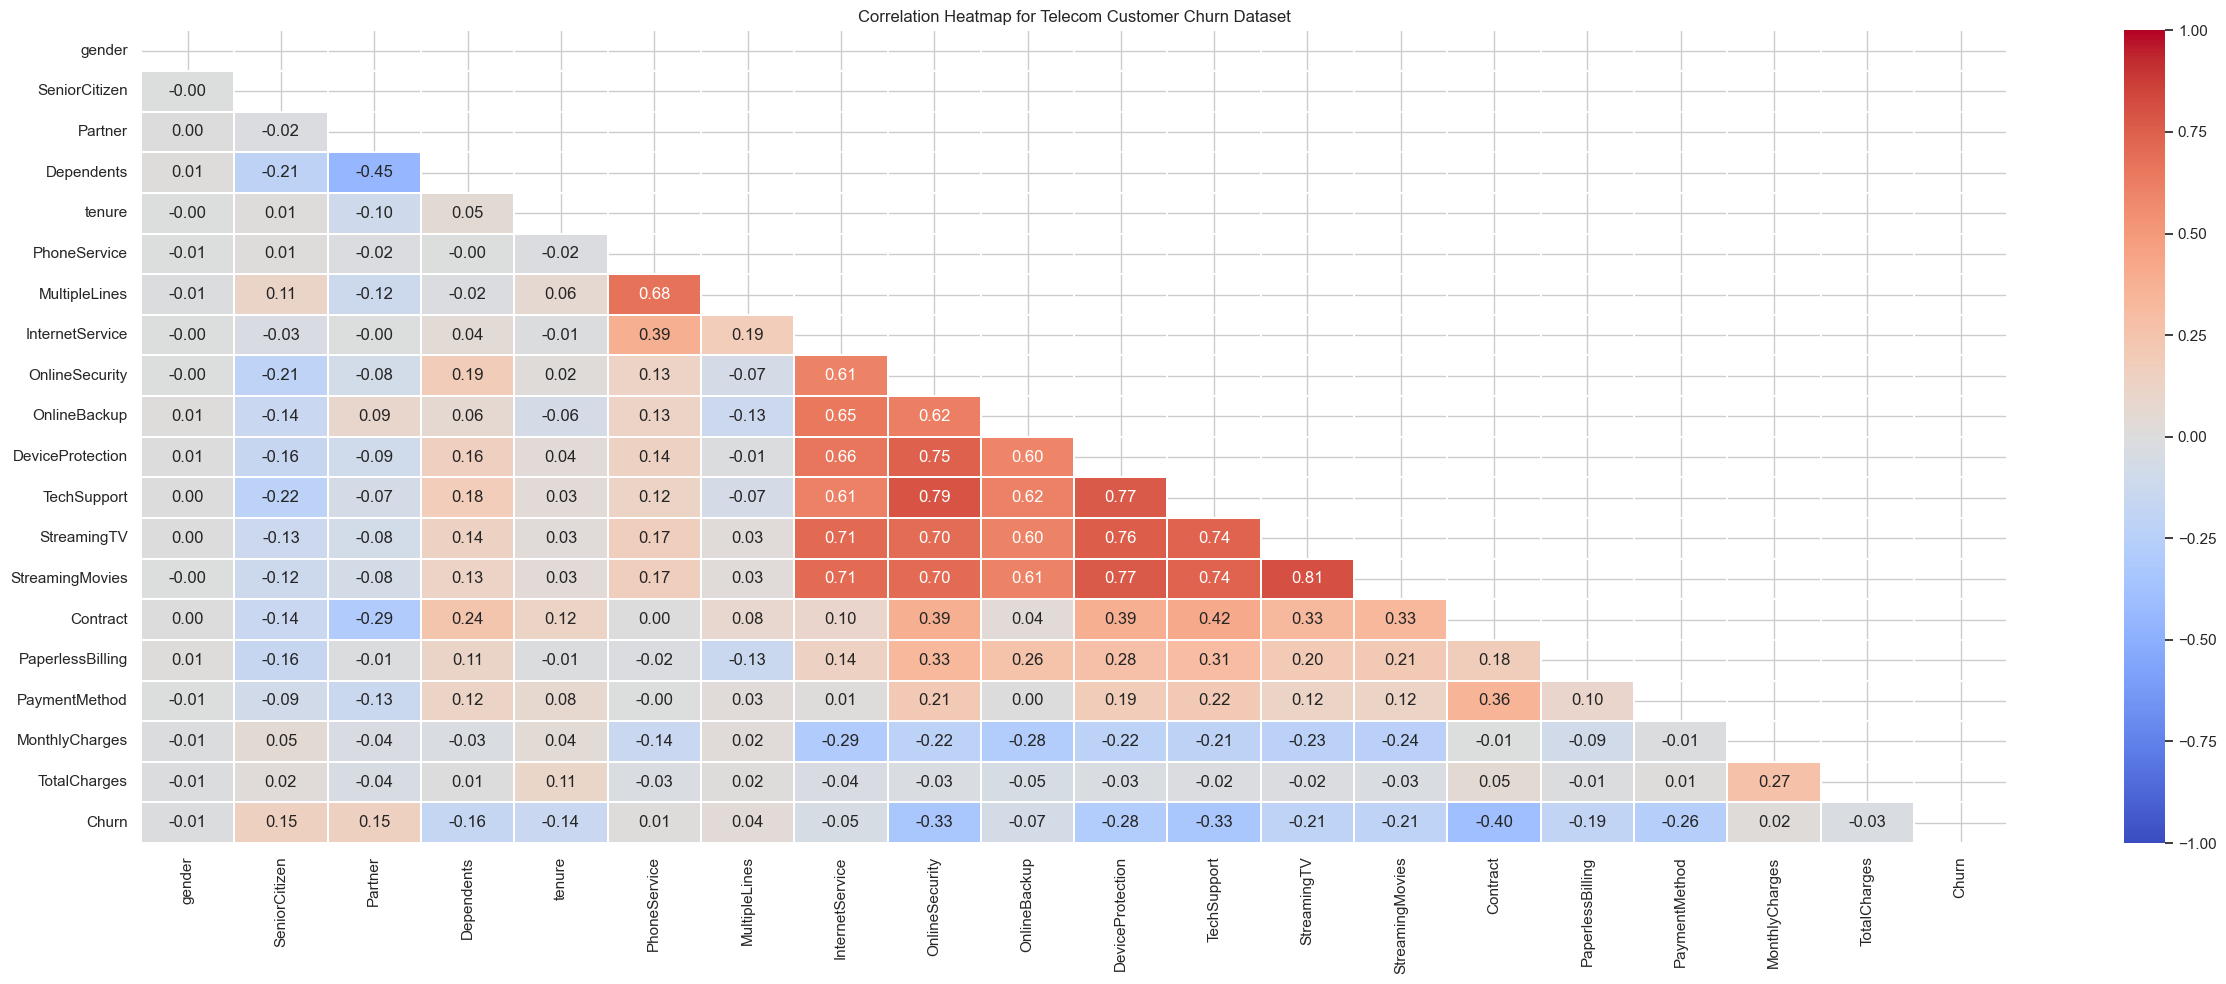

In [ ]:
plt.figure(figsize=(25,10))

#  Convert all columns to numeric codes using factorize (categorical → numbers)
df_numeric = df.apply(lambda x: pd.factorize(x)[0])

# Step 3: Calculate correlation matrix
corr = df_numeric.corr()

# Step 4: Create a mask for the upper triangle (to avoid duplicate info)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Step 5: Plot heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.2,
    vmin=-1,
    vmax=1,
    xticklabels=corr.columns,
    yticklabels=corr.columns
)
plt.title('Correlation Heatmap for Telecom Customer Churn Dataset')
plt.tight_layout()
plt.show()

### Correlation / Association tests: Use statistical tests to find strong relationships with churn

Goal:

You want to find which features (columns) in your data have a strong relationship with Churn — that means, which factors are influencing whether a customer stays or leaves.

1. Numerical vs Churn
- **We check:**
  - Do higher or lower values of these numbers affect churn?

### We use something called Point Biserial Correlation.
  - If the result is a high positive or negative number, that column strongly affects churn.



In [ ]:
from scipy. stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Convert Churn to binary
df['Churn_binary'] = LabelEncoder().fit_transform(df['Churn'])

for col in num_col:
    corr,p_value = pointbiserialr(df[col], df['Churn_binary'])
    print(f"{col}: Correlation = {corr:.3f}, p-value = {p_value:.4f}")

tenure: Correlation = -0.352, p-value = 0.0000
MonthlyCharges: Correlation = 0.193, p-value = 0.0000
TotalCharges: Correlation = nan, p-value = nan


- Tenure: -0.354 Correlation :  Strong negative correlation. Customer who stay longer Churn less.

- Monthly Charge: 0.193  : Weak positive correlation. Customers with higher monthly bills are slightly more likely to churn.

- TotalCharge:  -0.199  : 	Weak negative correlation. Customers who paid more over time tend to churn less.

<span style = color:red>**Business Conclusion:**

Customers who stay longer and have paid more overall are more loyal. But high monthly bills might make some customers leave.
So the company should:

Reward long-term customers.

Reduce monthly costs or provide more value to high-paying customers.

------------------------------------------------------------------

**2. Categorical vs Churn**
  - These are Yes/No or category columns like:

We check:
  - Do some categories (like Month-to-month contract) have more churn than others?

We use a test called Chi-Square test.

Ques: What You did:

- You checked whether each categorical feature has a strong association with Churn using the Chi-Square test.

- p-value < 0.05 → Significant relationship with Churn (keep this column).

- p-value ≥ 0.05 → No significant relationship (can consider dropping for model).

In [ ]:
# Categorical vs Categorical (Churn)
# Use Chi-Square Test 

from scipy.stats import chi2_contingency

# Chi-square test
for col in cat_col:
    ct = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"{col}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    print('_'*45)

gender: Chi2 = 0.48, p-value = 0.4866
_____________________________________________
SeniorCitizen: Chi2 = 159.43, p-value = 0.0000
_____________________________________________
Partner: Chi2 = 158.73, p-value = 0.0000
_____________________________________________
Dependents: Chi2 = 189.13, p-value = 0.0000
_____________________________________________
PhoneService: Chi2 = 0.92, p-value = 0.3388
_____________________________________________
MultipleLines: Chi2 = 11.33, p-value = 0.0035
_____________________________________________
InternetService: Chi2 = 732.31, p-value = 0.0000
_____________________________________________
OnlineSecurity: Chi2 = 850.00, p-value = 0.0000
_____________________________________________
OnlineBackup: Chi2 = 601.81, p-value = 0.0000
_____________________________________________
DeviceProtection: Chi2 = 558.42, p-value = 0.0000
_____________________________________________
TechSupport: Chi2 = 828.20, p-value = 0.0000
__________________________________________

**<span style = color:red>'Gender' or 'Phoneservice' columns are Less useful columns for predicting churn**

-----------------------------------------------------------

### Feature Importance using Tree-Based Model

- We can also train a machine learning model like Random Forest, which tells us:

  -  “Which columns are most useful to predict churn?”

- It gives a list of features with scores. The higher the score, the more important that column is.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split X and y
X = df_encoded.drop(columns=['Churn', 'Churn_binary'])
y = df_encoded['Churn_binary']

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


TotalCharges        0.189325
MonthlyCharges      0.180916
tenure              0.157715
Contract            0.079453
PaymentMethod       0.051265
OnlineSecurity      0.045211
TechSupport         0.043322
gender              0.027700
OnlineBackup        0.027432
InternetService     0.027298
PaperlessBilling    0.024954
MultipleLines       0.022513
Partner             0.021976
DeviceProtection    0.021248
SeniorCitizen       0.021066
Dependents          0.019457
StreamingTV         0.017370
StreamingMovies     0.017042
PhoneService        0.004739
dtype: float64


# Data Preprocessing

Ensure Your data is clean and ready for modeling.

#### Key Actions:
- Convert categorical Variable Using:
  - Label Encoding for binary categories (Yes/No, Male/Female).
  - One-Hot Encoding for multi-category features (like PaymentMethod, Contract, etc.).

- Scale numerical features (tenure, MonthlyCharges, TotalCharges) using StandardScaler or MinMaxScaler

In [74]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(series):
    """
    Converts an object-type Pandas Series with binary categories to integer using LabelEncoder.
    
    Parameters:
    series (pd.Series): The input Pandas Series.
    
    Returns:
    pd.Series: Transformed Series with integer labels.
    """
    if series.dtype == 'object':
        le = LabelEncoder()
        return pd.Series(le.fit_transform(series), index=series.index)
    else:
        return series  # Return unchanged if not object


In [76]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


### Train- Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']             # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Why stratify=y?
# To make sure the class distribution of Churn (0/1) is preserved in both training and test sets — important for imbalanced data.

### Feature Scaling on Training Data

In [ ]:
# Scale the numeric features only on training data to avoid data leakage.

from sklearn.preprocessing import StandardScaler

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # adjust to your dataset

scaler = StandardScaler()

# Fit the scaler on training data ONLY
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply the SAME scaler on test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7963094393186657
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[925 110]
 [177 197]]
